In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import time
%matplotlib inline
plt.rcParams.update({'font.size': 12})

In [2]:
Colour_Dict = {0:"orange", 1:"blue"}
Mosaic_Cat_Dict = {1: 'A',
2: 'B',
3: 'C',
4: 'D',
5: 'E',
6: 'F',
7: 'G',
8: 'H',
9: 'I',
10: 'J',
11: 'K',
12: 'L',
13: 'M',
14: 'N',
15: 'O',
}

In [49]:
font = {'size'   : 10}
matplotlib.rc('font', **font)
#path = "C:\\Users\\Jack\\OneDrive\\Uni Work\\Project\\Dashboard Trial.xlsx"
path = "Data/Data_V1.4.csv"
df = pd.read_csv(path)

In [42]:
df_OAC = pd.read_csv("Data/OAC/National_Statistics_Postcode_Lookup_UK.csv")
print(len(df_OAC))

1749865


In [50]:
#Splits postcode into PO_IN and PO_OUt
df_postcode_split = df_OAC["Postcode 2"].str.split(" ", n = 1, expand = True) 

#Need to remove the white space from each.
df_postcode_split[0] = df_postcode_split[0].str.strip()
df_postcode_split[1] = df_postcode_split[1].str.strip()

df_OAC["JAT Postcode"] = df_postcode_split[0] + " " + df_postcode_split[1]

df["Postcode"] = df["PO_OUT"] + " " +df["PO_IN"]

#Merges the two datasets
df_merged = df.merge(df_OAC, how="left", left_on="Postcode", right_on="JAT Postcode").copy()

#df_merged["Supergroup"] = df_merged["Output Area Classification Name"].str.split(";", n = 1, expand = True)[0]

df_merged["Group"] = df_merged['Output Area Classification Code'].str.slice(0,2) + " " + df_merged["Output Area Classification Name"].str.split(";", n = 1, expand = True)[1].str.split(";", n = 1, expand = True)[0]

df_TEMP = df_merged[df.columns].copy()
df_TEMP["OAC_Group"] = df_merged["Group"].copy()

In [51]:
df = None 
df = df_TEMP.copy()

This section changes the dates to date format as they by default are loaded as objects and replace Mosaic catergory with letter rather than the numbers provided.

In [52]:
df["Date Create"] = pd.to_datetime(df["DATE_CR_DB"])
df["Last Ask Date"] = pd.to_datetime(df["LAST_ASK"])
df.drop(["DATE_CR_DB", "LAST_ASK"], axis=1, inplace=True)
#This creates the difference in months between ask and date created on db
df["Months Between DateCr and Last Ask"] = ((df["Last Ask Date"] - df["Date Create"])/np.timedelta64(1, 'M'))

df["MOSAIC_GROUP"].replace(to_replace= Mosaic_Cat_Dict, inplace=True)

In [5]:
df.head(5)

,URN,DV,INCOME,PAY_DATE,TIME_TILL_PAY,AGE_DESC,MOSAIC_GROUP,MOSAIC_GROUP_DESC,MOSAIC_TYPE,MOSAIC_CATERGORY_DESC,...,TOTAL_YEARLY_CHARGE,TOTAL_NUM_MONTH_PAID,DM_PREVIOUS_12_MONTHS,NUM_TRANS_LST_24,DONATED_LST_24,PO_OUT,PO_IN,Date Create,Last Ask Date,Months Between DateCr and Last Ask
0,1,0,NaN,NaN,NaN,Age 66-70,E,Senior Security,19.0,Senior Security,...,0.00,0,3,0,0.00,DD6,9EX,1985-01-01,2017-03-16,386.439147
1,2,0,NaN,NaN,NaN,Age 46-50,G,Domestic Success,27.0,Domestic Success,...,0.00,0,-1,0,0.00,RG41,2RA,1999-01-05,2017-03-16,218.320705
2,3,0,NaN,NaN,NaN,Age 46-50,A,City Prosperity,2.0,City Prosperity,...,324.00,455,11,48,648.00,AB11,7UR,1985-01-01,2018-06-10,401.256699
3,4,0,NaN,NaN,NaN,Age 56-60,F,Suburban Stability,22.0,Suburban Stability,...,240.00,351,6,48,480.00,LN4,2PP,1999-01-05,2018-06-10,233.138257
4,5,0,NaN,NaN,NaN,Age 66-70,C,Country Living,10.0,Country Living,...,966.96,478,-1,96,1876.18,TN5,6EY,1999-01-05,2018-06-10,233.138257


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133460 entries, 0 to 133459
Data columns (total 33 columns):
URN                                   133460 non-null int64
DV                                    133460 non-null int64
INCOME                                12713 non-null float64
PAY_DATE                              12713 non-null object
TIME_TILL_PAY                         12713 non-null float64
AGE_DESC                              109288 non-null object
MOSAIC_GROUP                          121911 non-null object
MOSAIC_GROUP_DESC                     121911 non-null object
MOSAIC_TYPE                           121911 non-null float64
MOSAIC_CATERGORY_DESC                 121911 non-null object
SEX                                   131827 non-null object
TITLE                                 130351 non-null object
TOWN                                  133460 non-null object
APP_CONTACTED                         133460 non-null int64
APP_DONOR                             

In [7]:
Income = df["INCOME"].dropna(axis=0).copy()

In [54]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame(data=percent_missing.values, index=percent_missing.index)
missing_value_df.columns = ["Missing Value %"]
missing_value_df.loc[missing_value_df["Missing Value %"]>0]

,Missing Value %
INCOME,90.474299
PAY_DATE,90.474299
TIME_TILL_PAY,90.474299
AGE_DESC,18.111794
MOSAIC_GROUP,8.653529
MOSAIC_GROUP_DESC,8.653529
MOSAIC_TYPE,8.653529
MOSAIC_CATERGORY_DESC,8.653529
SEX,1.223588
TITLE,2.329537


In [55]:
df_base = df[["URN","DV", "INCOME", "AGE_DESC", "SEX", "TOWN","TITLE", "OAC_Group"]].copy()
df_base.columns = ["URN", "DV","Donations", "Age Band", "Gender", "Town", "Title", "OAC_Group"]

df_base["Mosaic Group"] = df["MOSAIC_GROUP"].astype(str) + " " + df["MOSAIC_GROUP_DESC"]
df_base.head(5)

,URN,DV,Donations,Age Band,Gender,Town,Title,OAC_Group,Mosaic Group
0,1,0,NaN,Age 66-70,M,TAYPORT,MR,5B Ageing urban living,E Senior Security
1,2,0,NaN,Age 46-50,F,WOKINGHAM,MRS,5A Urban professionals and families,G Domestic Success
2,3,0,NaN,Age 46-50,F,ABERDEEN,MRS,5A Urban professionals and families,A City Prosperity
3,4,0,NaN,Age 56-60,F,LINCOLN,MRS,5A Urban professionals and families,F Suburban Stability
4,5,0,NaN,Age 66-70,F,WADHURST,MISS,1B Rural tenants,C Country Living


In [56]:
df_base.groupby(['Mosaic Group'])['Donations'].agg(["sum", "mean"])

,sum,mean
Mosaic Group,,
A City Prosperity,51664.00,60.496487
B Prestige Positions,146262.82,59.699110
C Country Living,113502.65,58.057621
D Rural Reality,23957.44,40.264605
E Senior Security,106830.45,45.517874
F Suburban Stability,35252.47,39.654072
G Domestic Success,25676.10,47.813966
H Aspiring Homemakers,5783.50,37.800654
I Family Basics,2125.00,35.416667


In [11]:
df_base["Donations"].sum()

651127.26

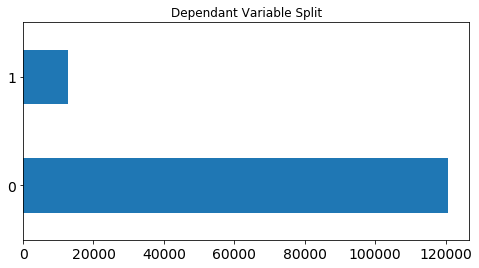

In [12]:
#What is the DV split
df['DV'].value_counts().map("{:,}".format)
#Plot this split as horizontal bar graph
df['DV'].value_counts().plot("barh"
  ,title="Dependant Variable Split",fontsize=14, figsize=(8,4))

0)    90.474299
1)     9.525701
dtype: float64


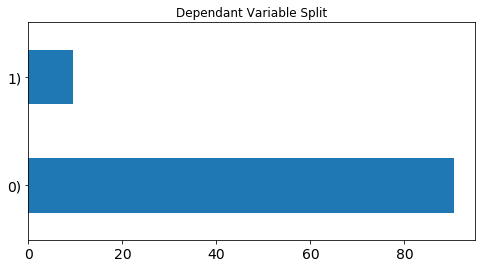

In [13]:
DV_Perc = df['DV'].value_counts()/df['DV'].value_counts().sum()*100
DV_Perc = pd.Series((DV_Perc.values), index=["0)","1)"])

print(DV_Perc)

DV_Perc.plot("barh",title="Dependant Variable Split",fontsize=14, figsize=(8,4))

In [14]:
plt.style.use('bmh')

## The next two sections of code output the distribution of the catergorical variables. The second block the overlays the DV to see if how the distribution varies.

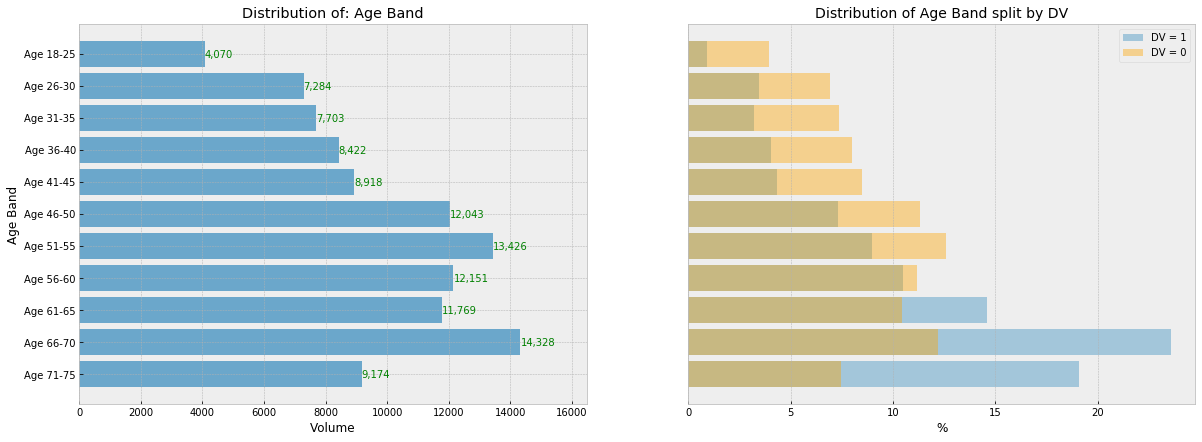

<Figure size 432x432 with 0 Axes>

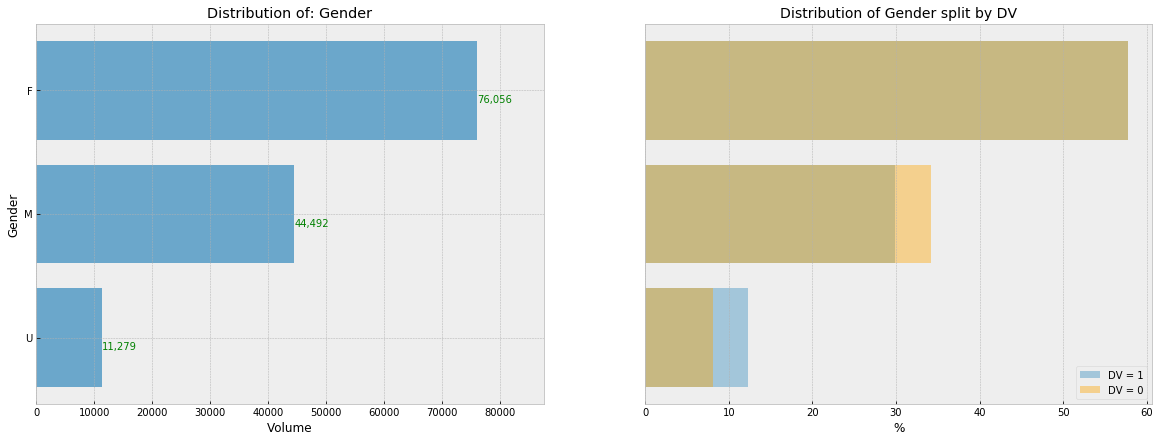

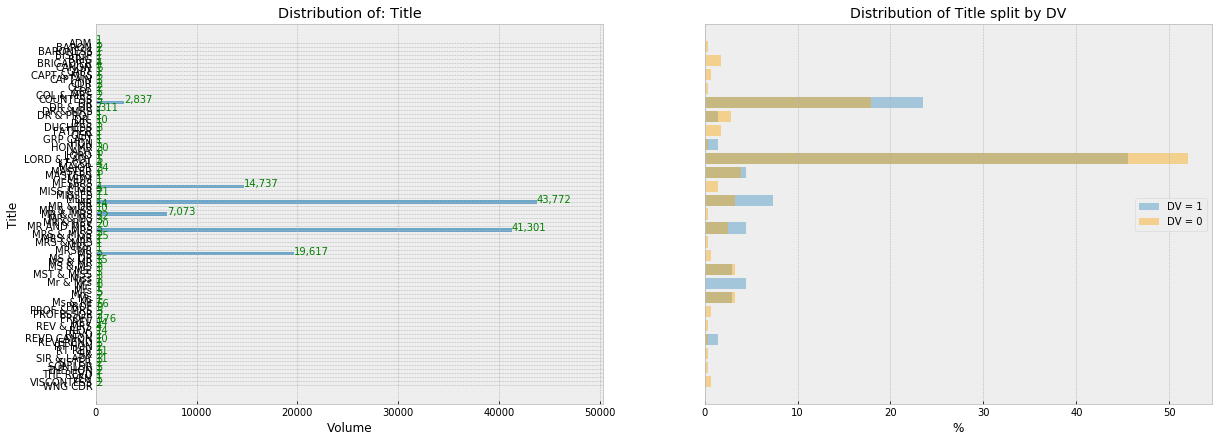

<Figure size 432x432 with 0 Axes>

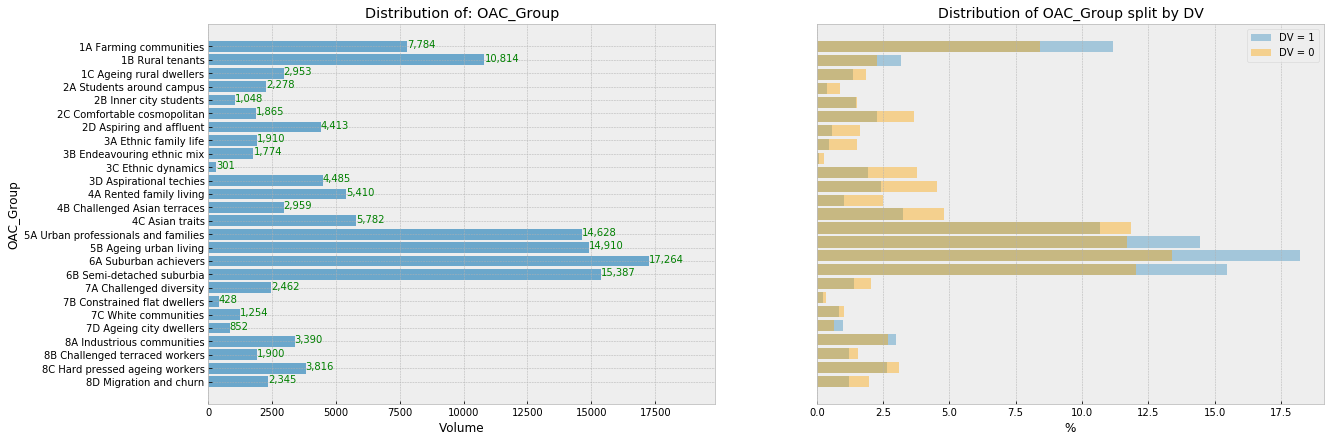

<Figure size 432x432 with 0 Axes>

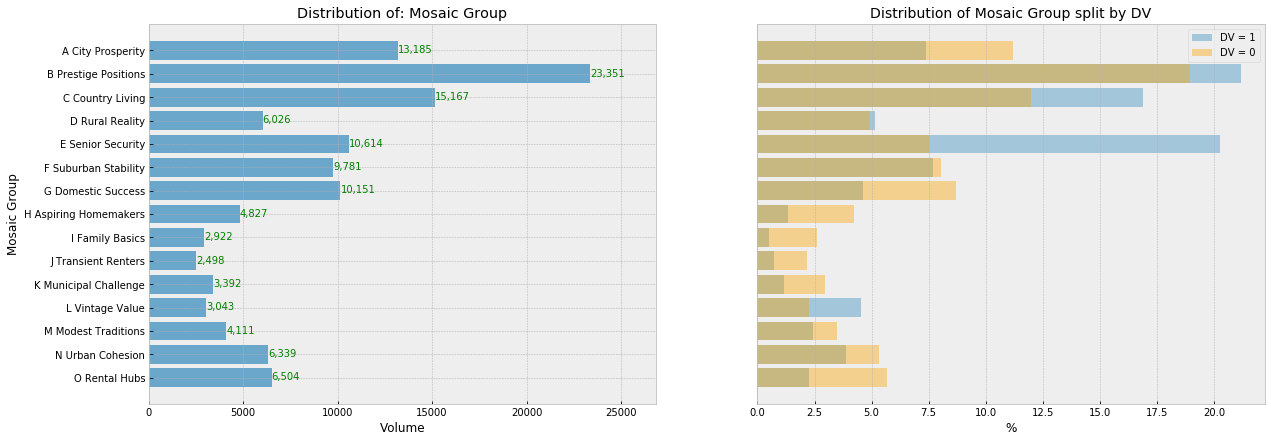

<Figure size 432x432 with 0 Axes>

In [57]:
for i, col in enumerate(df_base.drop(["URN","DV","Town", "Donations"],axis=1).columns):
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
    
    #Creates temp series and sorts by index
    Temp = df_base[col].value_counts(dropna = True).sort_index(ascending=False)
    plt.figure(i, figsize=(6,6))
    ax[0].barh(Temp.index, Temp.values, alpha=0.7)
    
    #plots title using col for each graph
    ax[0].set_title("Distribution of: " + str(col))
    
    #Extends the X axis so labels will fit. Uses max function so unique for each graph.
    ax[0].set_xlim(right = (Temp.max() * 1.15))
    ax[0].set_ylabel(col)
    ax[0].set_xlabel("Volume")
    
    #Plots the data labels for each graph
    for j, val in enumerate(Temp.values):
        ax[0].text(val , j-0.1 ,str( "{:,}".format( val, 0 )), color='green')
    
    Temp = df_base[["DV",col]].copy()
    #Creates column of 1s
    Temp["Val"] = 1

    #Creates a pivot table with catergories as rows and DV as columns
    Pivot = pd.pivot_table(Temp, values=["Val"], index=[col], 
                   columns=["DV"], aggfunc=np.sum)

    #Plots this on a bar graph sort by 0 and with top 25 values
    #Total = Pivot.sort_values([('Val', 0)], ascending=False).head(25)
    Total = Pivot.sort_index(ascending=False).head(25)
    
    DV_0 = (Total["Val",0] / Total["Val",0].sum())*100
    DV_1 = (Total["Val",1] / Total["Val",1].sum())*100

    #Plots mosaic as % of the total
    ax[1].barh(DV_1.index, DV_1.values, alpha=0.4, label="DV = 1")
    ax[1].barh(DV_0.index, DV_0.values, alpha=0.4, label="DV = 0", color="orange")
    ax[1].set_title("Distribution of "+ col + " split by DV", fontsize=14)
    ax[1].set_yticks([])
    ax[1].set_xlabel("%")    
    ax[1].legend()
    
    
    plt.show()

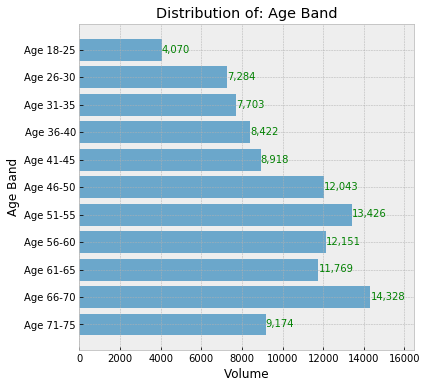

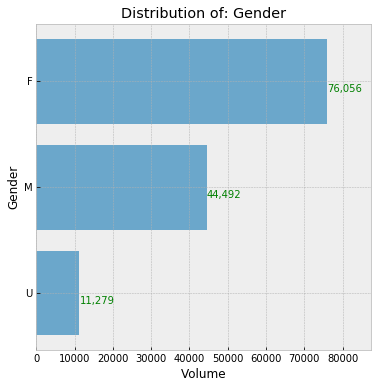

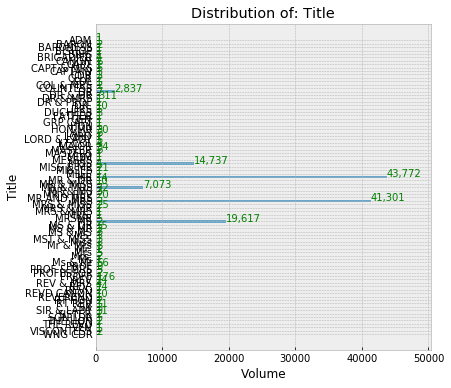

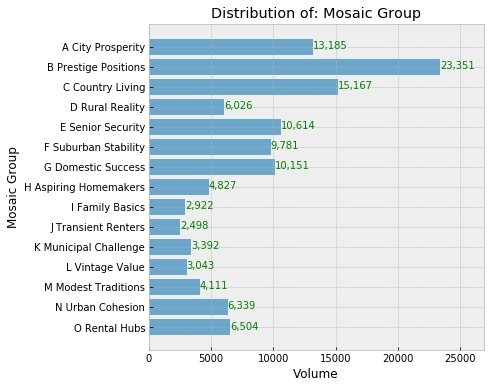

In [16]:
for i, col in enumerate(df_base.drop(["URN","DV","Town", "Donations"],axis=1).columns):
    
    #Creates temp series and sorts by index
    Temp = df_base[col].value_counts(dropna = True).sort_index(ascending=False)
    plt.figure(i, figsize=(6,6))
    plt.barh(Temp.index, Temp.values, alpha=0.7)
    
    #plots title using col for each graph
    plt.title("Distribution of: " + str(col))
    
    #Extends the X axis so labels will fit. Uses max function so unique for each graph.
    plt.xlim(right = (Temp.max() * 1.15))
    plt.ylabel(col)
    plt.xlabel("Volume")
    
    #Plots the data labels for each graph
    for i, val in enumerate(Temp.values):
        plt.text(val , i-0.1 ,str( "{:,}".format( val, 0 )), color='green')
        
    plt.show()

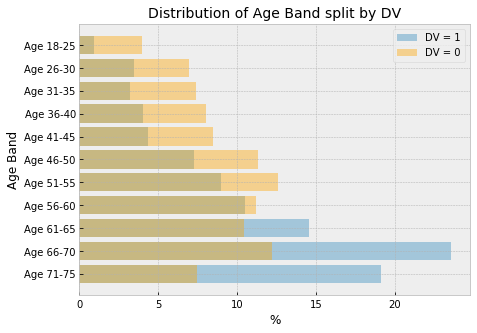

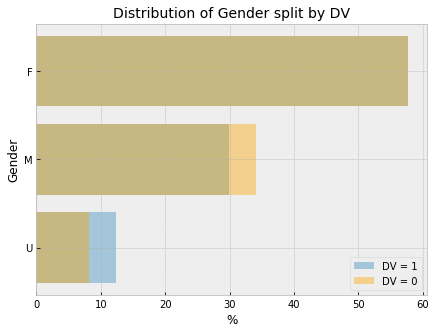

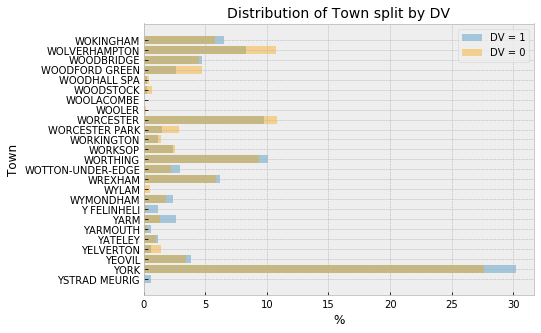

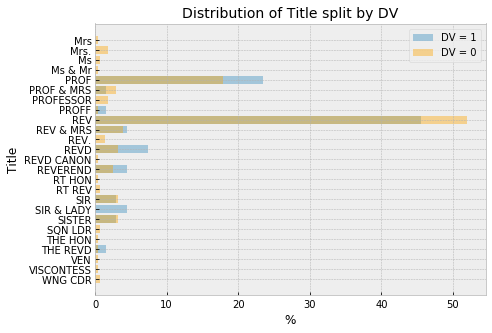

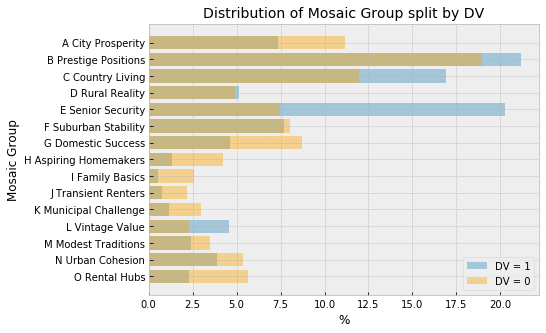

In [17]:
for i, col in enumerate(df_base.drop(["URN","DV","Donations"],axis=1).columns):
    
    Temp = df_base[["DV",col]].copy()
    #Creates column of 1s
    Temp["Val"] = 1

    #Creates a pivot table with catergories as rows and DV as columns
    Pivot = pd.pivot_table(Temp, values=["Val"], index=[col], 
                   columns=["DV"], aggfunc=np.sum)

    #Plots this on a bar graph sort by 0 and with top 25 values
    #Total = Pivot.sort_values([('Val', 0)], ascending=False).head(25)
    Total = Pivot.sort_index(ascending=False).head(25)
    
    DV_0 = (Total["Val",0] / Total["Val",0].sum())*100
    DV_1 = (Total["Val",1] / Total["Val",1].sum())*100

    #Plots mosaic as % of the total
    plt.figure(i, figsize=(7,5))
    plt.barh(DV_1.index, DV_1.values, alpha=0.4, label="DV = 1")
    plt.barh(DV_0.index, DV_0.values, alpha=0.4, label="DV = 0", color="orange")
    plt.title("Distribution of "+ col + " split by DV", fontsize=14)
    plt.ylabel(col)
    plt.xlabel("%")
    plt.legend()


### The next block produces correlation matrix for numerical data

Text(0.5, 1, 'Correlation Matrix')

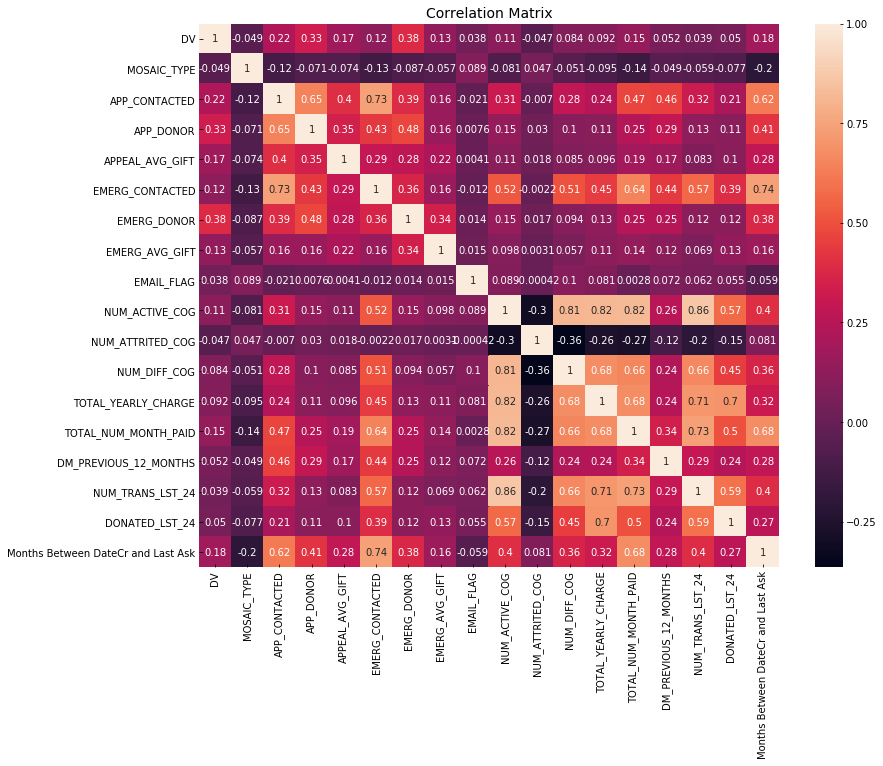

In [18]:
#Correlation Matrix for numerical data.
df_corr = df[df.drop(["INCOME","TIME_TILL_PAY","URN"], axis=1).select_dtypes(["float", "int64"]).columns].copy()
df_corr.fillna(-1 ,axis=1, inplace=True)

plt.figure(figsize=(13,10))
sns.heatmap(df_corr.corr(), annot=True)
plt.title("Correlation Matrix", fontsize=14)

<BarContainer object of 18 artists>

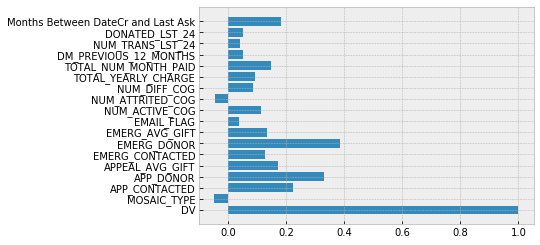

In [19]:
#plt.figure(figsize=(13,10))
plt.barh(df_corr.corr()["DV"].index, df_corr.corr()["DV"].values)
#plt.title("Correlation Matrix", fontsize=14)

## The next section is all about previous campaign performance for Emergency appeals and Cash appeals.

In [20]:
df_numeric = df[["URN","DV","EMERG_CONTACTED", "EMERG_DONOR","APP_CONTACTED", "APP_DONOR", "APPEAL_AVG_GIFT"]].copy()

#### Emergency Appeal

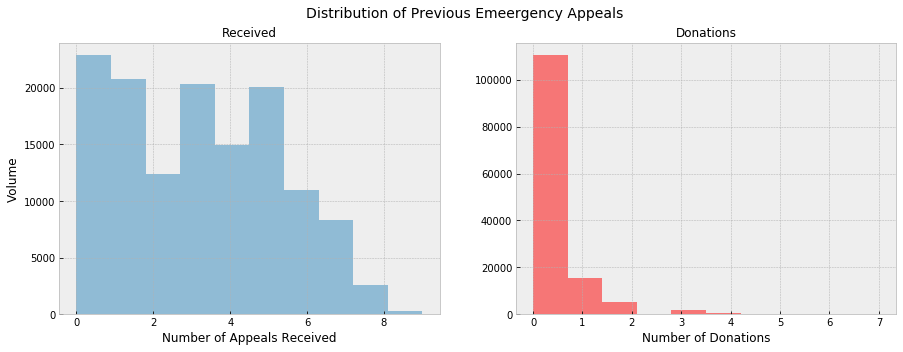

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].hist(df_numeric["EMERG_CONTACTED"]/1.0, alpha=0.5)
ax[0].set_title("Received", size=12)
ax[0].set_xlabel("Number of Appeals Received")
ax[0].set_ylabel("Volume")

ax[1].hist(df_numeric["EMERG_DONOR"]/1.0, alpha=0.5, color="Red")
ax[1].set_title("Donations", size=12)
ax[1].set_xlabel("Number of Donations")
plt.suptitle('Distribution of Previous Emeergency Appeals', fontsize=14)
plt.show()

In [22]:
def Heat_Map_Sns(df, X, Y):
    
    Temp_Head = (df[X].astype(str) + "," + df[Y].astype(str)).value_counts()
    
    Temp_Head = (Temp_Head/Temp_Head.sum())*100.0
    
    #Splits the column by commas so I can obtain the placement on the grid.
    Temp_Head_2 = pd.DataFrame()
    Temp_Head_2["Index"] = Temp_Head.index
    Temp_Head_2["Value"] = Temp_Head.values
    Temp_Head_2[["Contacted","Donor"]] =Temp_Head_2['Index'].str.split(',',expand=True)
    Temp_Head_2.drop(["Index"],axis=1, inplace=True)
    
    Heat_Map = np.zeros([Temp_Head_2["Contacted"].astype(int).max()+1, Temp_Head_2["Donor"].astype(int).max()+1])

    for i in range(0,len(Temp_Head_2)):
        Heat_Map[Temp_Head_2["Contacted"].astype(int).iloc[i], Temp_Head_2["Donor"].astype(int).iloc[i]] = Temp_Head_2["Value"].astype(int).iloc[i]

    Heat_Map[0,0] = 0
    return(Heat_Map)

Text(0.5, 1, 'Heatmap of Contacted Supporters against Donor')

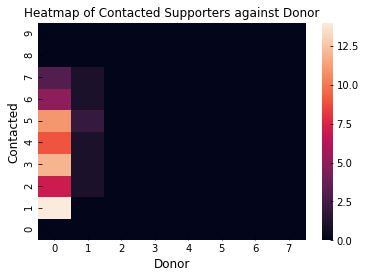

In [41]:
Emer_Heat_Map = Heat_Map_Sns(df=df_numeric, X="EMERG_CONTACTED", Y="EMERG_DONOR")

ax = sns.heatmap(Emer_Heat_Map)
ax.invert_yaxis()
plt.ylabel("Contacted")
plt.xlabel("Donor")
plt.title("Heatmap of Contacted Supporters against Donor", size=12)

Text(0.5, 0.98, 'Heatmap of Contacted Supporters against Donors')

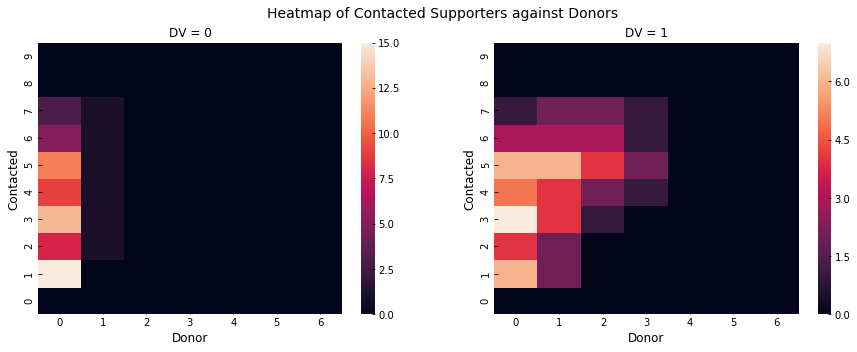

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

for i in range(0,2):
    Emer_Heat_Map = Heat_Map_Sns(df=df_numeric.loc[df_numeric["DV"]==i], X="EMERG_CONTACTED", Y="EMERG_DONOR")
    sns.heatmap(Emer_Heat_Map[0:16, 0:7], ax=ax[i])
    ax[i].set_title("DV = "+str(i), size=12)
    ax[i].invert_yaxis()
    ax[i].set_xlabel("Donor")
    ax[i].set_ylabel("Contacted")

plt.suptitle("Heatmap of Contacted Supporters against Donors", fontsize=14)

#### Cash Appeals

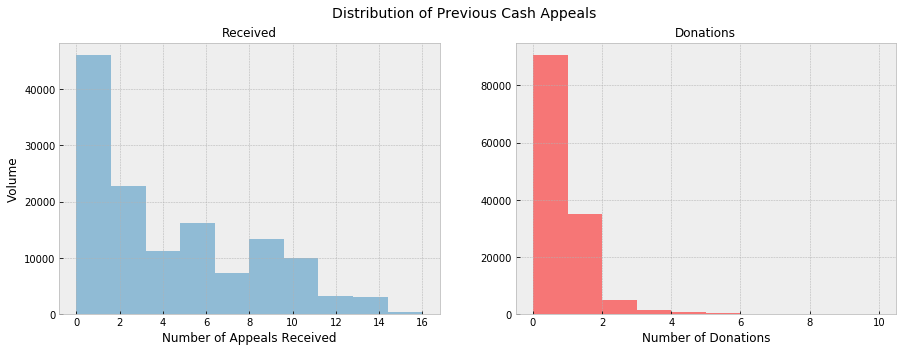

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].hist(df_numeric["APP_CONTACTED"]/1.0, alpha=0.5)
ax[0].set_title("Received", size=12)
ax[0].set_xlabel("Number of Appeals Received")
ax[0].set_ylabel("Volume")

ax[1].hist(df_numeric["APP_DONOR"]/1.0, alpha=0.5, color="Red")
ax[1].set_title("Donations", size=12)
ax[1].set_xlabel("Number of Donations")
plt.suptitle('Distribution of Previous Cash Appeals', fontsize=14)
plt.show()

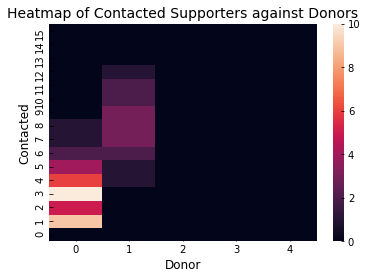

In [26]:
Appeal_Heat_Map = Heat_Map_Sns(df=df_numeric, X="APP_CONTACTED", Y="APP_DONOR")

ax = sns.heatmap(Appeal_Heat_Map[0:16, 0:5])
ax.invert_yaxis()
plt.ylabel("Contacted")
plt.xlabel("Donor")
plt.title("Heatmap of Contacted Supporters against Donors", fontsize=14)
plt.show()

Text(0.5, 0.98, 'Heatmap of Contacted Supporters against Donors')

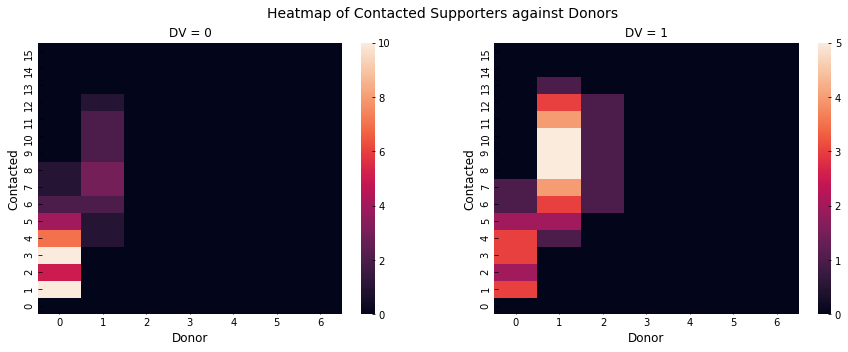

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

for i in range(0,2):
    Emer_Heat_Map = Heat_Map_Sns(df=df_numeric.loc[df_numeric["DV"]==i], X="APP_CONTACTED", Y="APP_DONOR")
    sns.heatmap(Emer_Heat_Map[0:16, 0:7], ax=ax[i])
    ax[i].set_title("DV = "+str(i), size=12)
    ax[i].invert_yaxis()
    ax[i].set_xlabel("Donor")
    ax[i].set_ylabel("Contacted")

plt.suptitle("Heatmap of Contacted Supporters against Donors", fontsize=14)

## I want to look at the different CoG feature I have produced.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133460 entries, 0 to 133459
Data columns (total 33 columns):
URN                                   133460 non-null int64
DV                                    133460 non-null int64
INCOME                                12713 non-null float64
PAY_DATE                              12713 non-null object
TIME_TILL_PAY                         12713 non-null float64
AGE_DESC                              109288 non-null object
MOSAIC_GROUP                          121911 non-null object
MOSAIC_GROUP_DESC                     121911 non-null object
MOSAIC_TYPE                           121911 non-null float64
MOSAIC_CATERGORY_DESC                 121911 non-null object
SEX                                   131827 non-null object
TITLE                                 130351 non-null object
TOWN                                  133460 non-null object
APP_CONTACTED                         133460 non-null int64
APP_DONOR                             

In [29]:
df_cog = df[["DV", "NUM_ACTIVE_COG", "NUM_DIFF_COG", "TOTAL_YEARLY_CHARGE", "TOTAL_NUM_MONTH_PAID", "NUM_ATTRITED_COG"]].copy()
df_cog.rename(index=str, columns={"TOTAL_YEARLY_CHARGE": "Total Yearly Charge", "TOTAL_NUM_MONTH_PAID": "Total Months Paid"}
             ,inplace=True)

In [30]:
df_cog["TYPE"] = np.where((df_cog["NUM_ACTIVE_COG"]>0) & (df_cog["NUM_ATTRITED_COG"]==0)
                          , "Active"
                          ,np.where((df_cog["NUM_ACTIVE_COG"]==0) & (df_cog["NUM_ATTRITED_COG"]>0)
                                    ,"Attrited"
                                    ,np.where((df_cog["NUM_ACTIVE_COG"]>0) & (df_cog["NUM_ATTRITED_COG"]>0)
                                              ,"Both"
                                              ,"No CoG"
                         )))

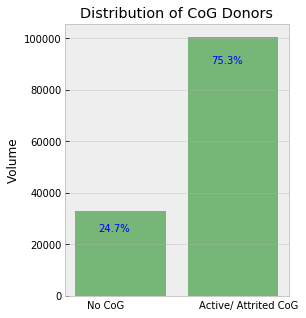

In [31]:
#Num_Cogs = (df_cog["NUM_ACTIVE_COG"] >0).value_counts()

Num_Cogs = ((df_cog["NUM_ACTIVE_COG"] + df_cog["NUM_ATTRITED_COG"]) > 0).value_counts()
Num_Cogs = Num_Cogs.sort_values()

plt.figure(figsize=(4,5))
plt.bar(Num_Cogs.index, Num_Cogs.values, alpha = 0.5, color="green")
plt.title("Distribution of CoG Donors")
plt.ylabel("Volume")
plt.xticks([])
for i, val in enumerate(Num_Cogs.reindex(["No CoG", "Active/ Attrited CoG"]).index):
    plt.text(i-0.3, -5000 , str(val), color='black')


plt.text(0-0.2, 25000 , str('{:.1%}'.format((Num_Cogs/Num_Cogs.sum()).values[0])), color='blue')
plt.text(1-0.2, 90000 , str('{:.1%}'.format((Num_Cogs/Num_Cogs.sum()).values[1])), color='blue')
plt.show()

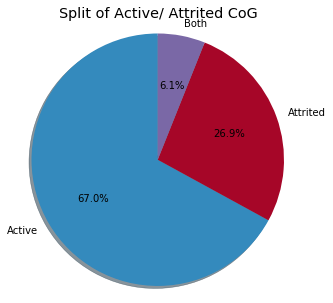

In [32]:
Pie_Series =  df_cog["TYPE"].loc[df_cog["TYPE"] != "No CoG"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(Pie_Series.values, 
        explode=(0.0,0.0,0.0),
        labels=Pie_Series.index,
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90)
plt.axis('equal')
plt.title("Split of Active/ Attrited CoG")
plt.show()

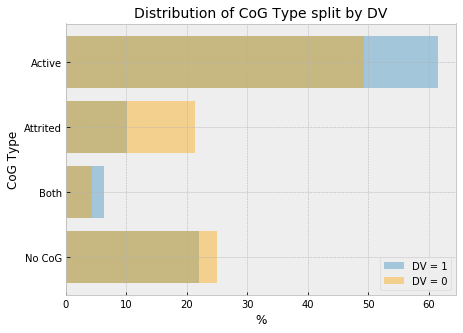

In [33]:
Temp = df_cog[["DV","TYPE"]].copy()
#Creates column of 1s
Temp["Val"] = 1

#Creates a pivot table with catergories as rows and DV as columns
Pivot = pd.pivot_table(Temp, values=["Val"], index=["TYPE"], 
               columns=["DV"], aggfunc=np.sum)

#Plots this on a bar graph sort by 0 and with top 25 values
#Total = Pivot.sort_values([('Val', 0)], ascending=False).head(25)
Total = Pivot.sort_index(ascending=False)

DV_0 = (Total["Val",0] / Total["Val",0].sum())*100
DV_1 = (Total["Val",1] / Total["Val",1].sum())*100

#Plots mosaic as % of the total
plt.figure(i, figsize=(7,5))
plt.barh(DV_1.index, DV_1.values, alpha=0.4, label="DV = 1")
plt.barh(DV_0.index, DV_0.values, alpha=0.4, label="DV = 0", color="orange")
plt.title("Distribution of "+ "CoG Type" + " split by DV", fontsize=14)
plt.ylabel("CoG Type")
plt.xlabel("%")
plt.legend()

For the next two section I am limiting it to just those who have an active CoG. Due to the high number of Non CoG donors the graph will always have high distribution spike at 0.

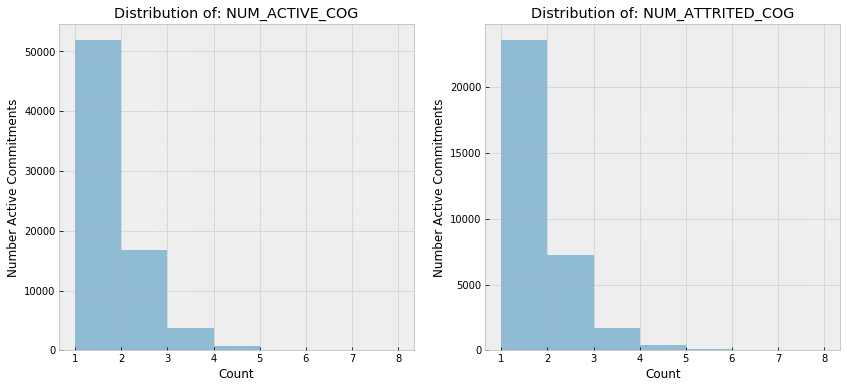

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
Columns = ["NUM_ACTIVE_COG", "NUM_ATTRITED_COG"]

for i, col in enumerate(Columns):
    
    Temp = df_cog[col].loc[df_cog[col] > 0].copy()
    
    ax[i].hist(Temp, bins=range(1, 8 + 1, 1) ,alpha=0.5)
    ax[i].title.set_text("Distribution of: "+str(col))
    ax[i].set_xlabel("Count")
    ax[i].set_ylabel("Number Active Commitments")

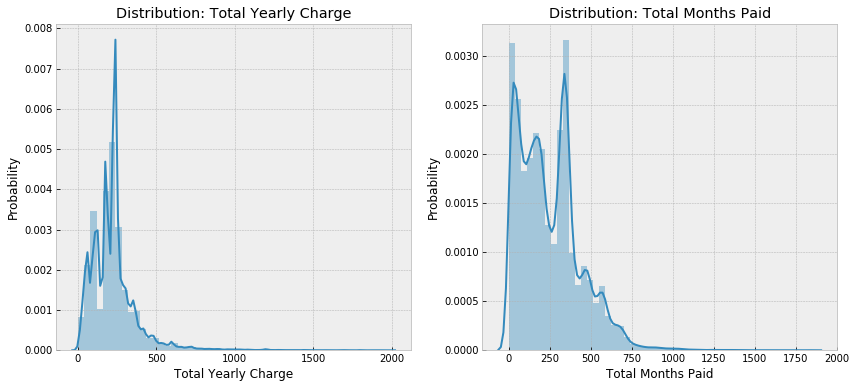

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
Columns = ["Total Yearly Charge", "Total Months Paid"]

for i, col in enumerate(Columns):
    
    #I am setting this at 2000 as I have a few extreme values (around 15 out of the whole dataset)
    Temp = df_cog[col].loc[(df_cog[col] < 2000) & (df_cog["TYPE"] == "Active")]
    
    sns.distplot(Temp.values,  ax=ax[i])
    ax[i].title.set_text("Distribution: "+str(col))
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Probability")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
Columns = ["Total Yearly Charge", "Total Months Paid"]

for i, col in enumerate(Columns):
    
    #I am setting this at 2000 as I have a few extreme values (around 15 out of the whole dataset)
    #Temp = df_cog[col].loc[(df_cog[col] < 2000) & (df_cog["TYPE"] == "Active")]
    for k in range(1,-1,-1):
    
        Temp = df_cog_2.loc[(df_cog_2["DV"]==k) & (df_cog_2[col] <  2000), col]
        #sns.distplot(Temp.values,  ax=ax[i])
        sns.distplot(Temp.values,  ax=ax[i], label= "DV = "+str(k), color= Colour_Dict.get(k))
    
    ax[i].title.set_text("Distribution: "+str(col))
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Probability")

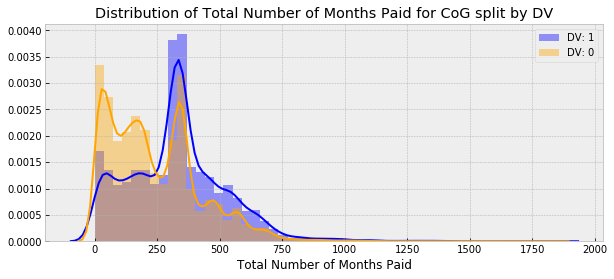

In [36]:
df_cog_2 = df_cog.loc[df_cog["TYPE"] == "Active"].copy()

# Runs the for loop backwards
plt.figure(figsize=(10,4))
for i in range(1,-1,-1):
    
    #Temp = (df_cog["TOTAL_NUM_MONTH_PAID"].loc[df_cog["DV"] == i]) & (df_cog["TOTAL_NUM_MONTH_PAID"].loc[df_cog["TOTAL_NUM_MONTH_PAID"] < 2000])
    Temp = df_cog_2.loc[(df_cog_2["DV"]==i) & (df_cog_2["Total Months Paid"] <  2000), "Total Months Paid"]
    sns.distplot(Temp.values, label= "DV: "+str(i), color= Colour_Dict.get(i))
            
plt.title("Distribution of Total Number of Months Paid for CoG split by DV")
plt.xlabel("Total Number of Months Paid")
plt.legend()
plt.show()

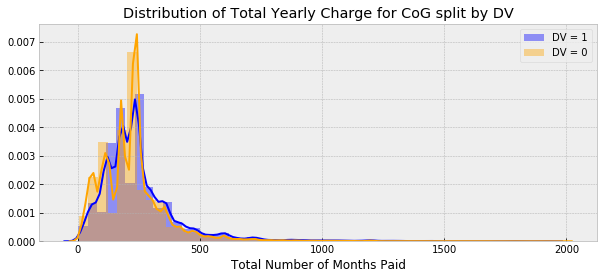

In [37]:
# Runs the for loop backwards
plt.figure(figsize=(10,4))
for i in range(1,-1,-1):
    
    #Temp = (df_cog["TOTAL_NUM_MONTH_PAID"].loc[df_cog["DV"] == i]) & (df_cog["TOTAL_NUM_MONTH_PAID"].loc[df_cog["TOTAL_NUM_MONTH_PAID"] < 2000])
    Temp = df_cog_2.loc[(df_cog_2["DV"]==i) & (df_cog_2["Total Yearly Charge"] <  2000), "Total Yearly Charge"]
    sns.distplot(Temp.values, label= "DV = "+str(i), color= Colour_Dict.get(i))
            
plt.title("Distribution of Total Yearly Charge for CoG split by DV")
plt.xlabel("Total Number of Months Paid")
plt.legend()
plt.show()

# Misc
## Other features that might be important but dont fit into one of the main catergories above

Text(0.5, 0.98, 'Distribution of Previous ask within last 12 months')

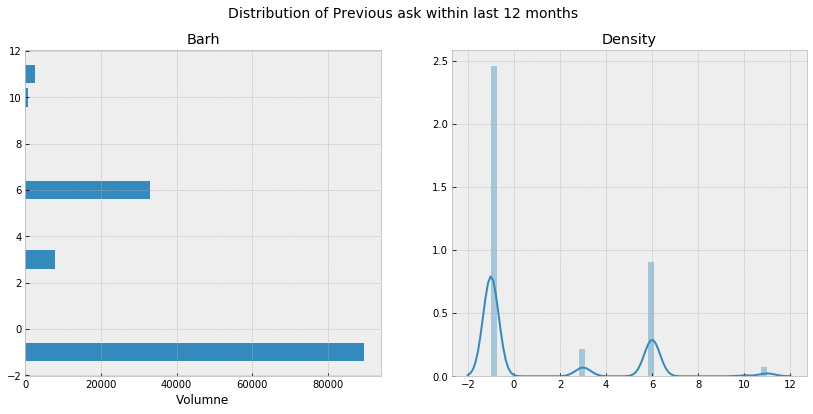

In [38]:
DM_Prev_Temp = df["DM_PREVIOUS_12_MONTHS"].value_counts()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

ax[0].barh(DM_Prev_Temp.index, DM_Prev_Temp.values)
ax[0].set_title("Barh")
ax[0].set_xlabel("Volumne")

sns.distplot(df["DM_PREVIOUS_12_MONTHS"].values, ax=ax[1])
ax[1].set_title("Density")
ax[1].set_xlabel("")

plt.suptitle("Distribution of Previous ask within last 12 months", fontsize=14)


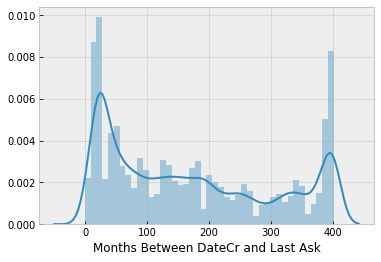

In [39]:
sns.distplot(df["Months Between DateCr and Last Ask"].dropna())